Load files

In [87]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

covid = pd.read_csv('covid.csv')
covid = pd.DataFrame(covid)
datewise = pd.read_csv('datewise.csv')
datewise = pd.DataFrame(datewise)

In [88]:
covid.head()

,Unnamed: 0,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ObservationDate
0,0,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
1,1,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22
2,2,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22
3,3,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22
4,4,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22


In [89]:
datewise.index = datewise['ObservationDate']
datewise.drop(columns='ObservationDate')

,Confirmed,Recovered,Deaths,Days Since,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
ObservationDate,,,,,,,,,
2020-01-22,555.0,28.0,17.0,0 days 00:00:00.000000000,4,3.063063,5.045045,510.0,45.0
2020-01-23,653.0,30.0,18.0,1 days 00:00:00.000000000,4,2.756508,4.594181,605.0,48.0
2020-01-24,941.0,36.0,26.0,2 days 00:00:00.000000000,4,2.763018,3.825717,879.0,62.0
2020-01-25,1438.0,39.0,42.0,3 days 00:00:00.000000000,4,2.920723,2.712100,1357.0,81.0
2020-01-26,2118.0,52.0,56.0,4 days 00:00:00.000000000,4,2.644004,2.455146,2010.0,108.0
...,...,...,...,...,...,...,...,...,...
2020-06-25,9609829.0,4838921.0,489312.0,155 days 00:00:00.000000000,26,5.091787,50.353872,4281596.0,5328233.0
2020-06-26,9801572.0,4945557.0,494181.0,156 days 00:00:00.000000000,26,5.041855,50.456774,4361834.0,5439738.0
2020-06-27,9979535.0,5051864.0,498710.0,157 days 00:00:00.000000000,26,4.997327,50.622238,4428961.0,5550574.0


In [90]:
datewise.head()

,ObservationDate,Confirmed,Recovered,Deaths,Days Since,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
ObservationDate,,,,,,,,,,
2020-01-22,2020-01-22,555.0,28.0,17.0,0 days 00:00:00.000000000,4,3.063063,5.045045,510.0,45.0
2020-01-23,2020-01-23,653.0,30.0,18.0,1 days 00:00:00.000000000,4,2.756508,4.594181,605.0,48.0
2020-01-24,2020-01-24,941.0,36.0,26.0,2 days 00:00:00.000000000,4,2.763018,3.825717,879.0,62.0
2020-01-25,2020-01-25,1438.0,39.0,42.0,3 days 00:00:00.000000000,4,2.920723,2.712100,1357.0,81.0
2020-01-26,2020-01-26,2118.0,52.0,56.0,4 days 00:00:00.000000000,4,2.644004,2.455146,2010.0,108.0


In [91]:
grouped_country = covid.groupby(["Country/Region", "ObservationDate"]).agg(
    {"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
grouped_country["Active Cases"] = grouped_country[
    "Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]

import numpy as np
grouped_country["log_confirmed"] = np.log(grouped_country["Confirmed"])
grouped_country["log_active"] = np.log(grouped_country["Active Cases"])

In [92]:
grouped_country

Confirmed  Recovered  Deaths  \
Country/Region                 ObservationDate                                 
 Azerbaijan                    2020-02-28             1.0        0.0     0.0   
Afghanistan                    2020-02-24             1.0        0.0     0.0   
                               2020-02-25             1.0        0.0     0.0   
                               2020-02-26             1.0        0.0     0.0   
                               2020-02-27             1.0        0.0     0.0   
...                                                   ...        ...     ...   
occupied Palestinian territory 2020-03-12             0.0        0.0     0.0   
                               2020-03-14             0.0        0.0     0.0   
                               2020-03-15             0.0        0.0     0.0   
                               2020-03-16             0.0        0.0     0.0   
                               2020-03-17             0.0        0.0     0.0   

                                                Active Cases  log_confirmed  \
Country/Region                 ObservationDate                                
 Azerbaijan                    2020-02-28                1.0            0.0   
Afghanistan                    2020-02-24                1.0            0.0   
                               2020-02-25                1.0            0.0   
                               2020-02-26                1.0            0.0   
                               2020-02-27                1.0            0.0   
...                                                      ...            ...   
occupied Palestinian territory 2020-03-12                0.0           -inf   
                               2020-03-14                0.0           -inf   
                               2020-03-15                0.0           -inf   
                               2020-03-16                0.0           -inf   
                               2020-03-17                0.0           -inf   

                                                log_active  
Country/Region                 ObservationDate              
 Azerbaijan                    2020-02-28              0.0  
Afghanistan                    2020-02-24              0.0  
                               2020-02-25              0.0  
                               2020-02-26              0.0  
                               2020-02-27              0.0  
...                                                    ...  
occupied Palestinian territory 2020-03-12             -inf  
                               2020-03-14             -inf  
                               2020-03-15             -inf  
                               2020-03-16             -inf  
                               2020-03-17             -inf  

[22269 rows x 6 columns]

## Data Analysis for India

#### For detailed Data analysis and Forecasting specific to India

The notebook consists of detailed data analysis specific to India. Comparison of India with the neighboring countries, Comparison with worst affected countries in this pandemic and try and build Machine Learning Prediction and Time Series and Forecasting models to try and understand the how the numbers are going to be in near future.

In [93]:
india = covid[covid['Country/Region']=='India']

In [94]:
india

,Unnamed: 0,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ObservationDate
430,57,NaN,India,1/30/20 16:00,1.0,0.0,0.0,2020-01-30
491,60,NaN,India,1/31/2020 23:59,1.0,0.0,0.0,2020-01-31
547,54,NaN,India,1/31/2020 8:15,1.0,0.0,0.0,2020-02-01
607,47,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0,2020-02-02
672,45,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0,2020-02-03
...,...,...,...,...,...,...,...,...
340833,3555,Tripura,India,2020-06-30 04:33:48,1380.0,1.0,1085.0,2020-06-29
340847,3569,Unknown,India,2020-06-30 04:33:48,7004.0,0.0,0.0,2020-06-29
340853,3575,Uttar Pradesh,India,2020-06-30 04:33:48,22828.0,672.0,15506.0,2020-06-29
340854,3576,Uttarakhand,India,2020-06-30 04:33:48,2831.0,39.0,2111.0,2020-06-29


In [95]:
datewise_india = india.groupby(['ObservationDate']).agg({'Confirmed':'sum',
                                                        'Recovered':'sum','Deaths':'sum'})
print(datewise_india.iloc[-1])
print('Total Active Cases: ', datewise_india['Confirmed'].iloc[-1]-datewise_india['Recovered'].iloc[-1]-datewise_india['Deaths'].iloc[-1])
print('Total CLosed Cases: ', datewise_india['Recovered'].iloc[-1]+datewise_india['Deaths'].iloc[-1])

Confirmed    566840.0
Recovered    334822.0
Deaths        16893.0
Name: 2020-06-29, dtype: float64
Total Active Cases:  215125.0
Total CLosed Cases:  351715.0


In [96]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india['Confirmed'],
                        mode='lines+markers', name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india['Recovered'],
                        mode='lines+markers', name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india['Deaths'],
                        mode='lines+markers', name='Death Cases'))

fig.update_layout(title='Growth of different types of cases in India',
                 xaxis_title='Date', yaxis_title='Number of Cases', 
                 legend= dict(x=0, y=1, traceorder='normal'))

fig.show()

In [97]:
import plotly.express as px

fig = px.bar(x=datewise_india.index, y=datewise_india['Confirmed']-datewise_india['Recovered']-datewise_india['Deaths'])
fig.update_layout(title='Distribution of Number of Active Cases in India',
                 xaxis_title='Date', yaxis_title='Number of Cases')
fig.show()

In [98]:
india_inc_confirm = []
india_inc_recover = []
india_inc_deaths = []

# 전날대비 증가율
for i in range(datewise_india.shape[0]-1):
    india_inc_confirm.append(((datewise_india['Confirmed'].iloc[i+1])/datewise_india['Confirmed'].iloc[i]))
    india_inc_recover.append(((datewise_india['Recovered'].iloc[i+1])/datewise_india['Recovered'].iloc[i]))
    india_inc_deaths.append(((datewise_india['Deaths'].iloc[i+1])/datewise_india['Deaths'].iloc[i]))
    
india_inc_confirm.insert(0,1)
india_inc_recover.insert(0,1)
india_inc_deaths.insert(0,1)

In [99]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=datewise_india.index, y=india_inc_confirm,
                        mode='lines', name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_inc_recover,
                        mode='lines', name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=india_inc_deaths,
                        mode='lines', name='Growth Factor of Death Cases'))

fig.update_layout(title='Datewise Growth Factor of Active and CLosed cases in India',
                 xaxis_title='Date', yaxis_title='Growth Factor',
                 legend=dict(x=0, y=1, traceorder='normal'))

fig.show()

In [100]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india['Confirmed'].diff().fillna(0),
                        mode='lines+markers', name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india['Recovered'].diff().fillna(0),
                        mode='lines+markers', name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india['Deaths'].diff().fillna(0),
                        mode='lines+markers', name='Death Cases'))

fig.update_layout(title='Daily increase in different types of cases in India',
                 xaxis_title='Date', yaxis_title='Number of Cases',
                 legend=dict(x=0,y=1, traceorder='normal'))

fig.show()

In [101]:
datewise_india.index = pd.to_datetime(datewise_india.index)
datewise_india["WeekOfYear"]=datewise_india.index.weekofyear

In [102]:
week_num_india = []
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(datewise_india['WeekOfYear'].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india['WeekOfYear']==i]['Confirmed'].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india['WeekOfYear']==i]['Recovered'].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india['WeekOfYear']==i]['Deaths'].iloc[-1])
    week_num_india.append(w)
    w+=1

In [103]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_confirmed,
                        mode='lines+markers', name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_recovered,
                        mode='lines+markers', name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_deaths,
                        mode='lines+markers', name='Weekly Growth of Death Cases'))

fig.update_layout(title='Weekly Growth of different types of Cases in India',
                 xaxis_title='Week Number', yaxis_title='Number of Cases',
                 legend=dict(x=0, y=1, traceorder='normal'))
fig.show()

Text(0.5, 1.0, "India's Weekwise increase in Number of Death Cases")

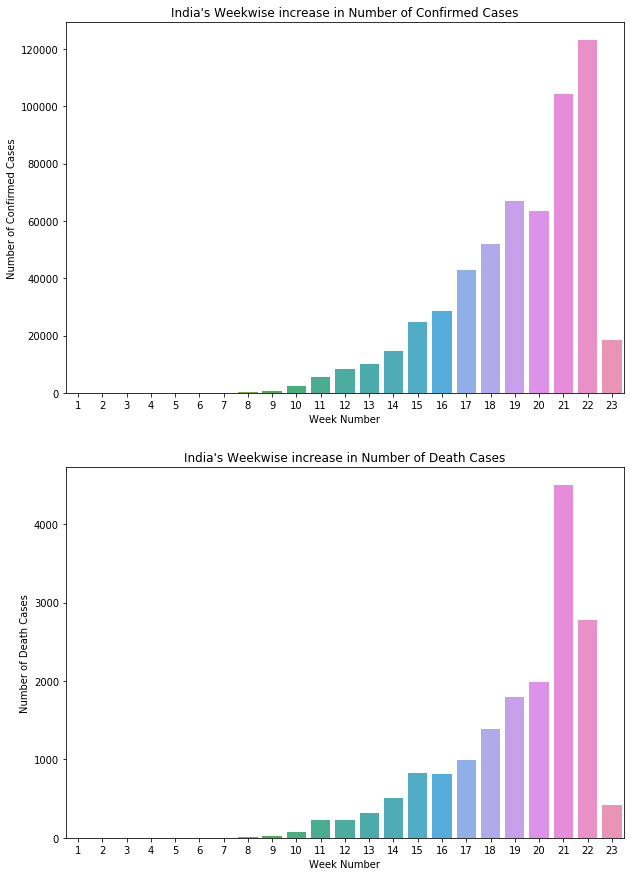

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

sns.barplot(x=week_num_india, y=pd.Series(india_weekwise_confirmed).diff().fillna(0), ax=ax1)
sns.barplot(x=week_num_india, y=pd.Series(india_weekwise_deaths).diff().fillna(0), ax=ax2)
ax1.set_xlabel('Week Number')
ax2.set_xlabel('Week Number')
ax1.set_ylabel('Number of Confirmed Cases')
ax2.set_ylabel('Number of Death Cases')
ax1.set_title("India's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("India's Weekwise increase in Number of Death Cases")

load extra files

In [108]:
datewise_Italy = pd.read_csv('datewise_Italy.csv')
datewise_Italy = pd.DataFrame(datewise_Italy)

datewise_US = pd.read_csv('datewise_US.csv')
datewise_US = pd.DataFrame(datewise_US)

datewise_spain = pd.read_csv('datewise_spain.csv')
datewise_spain = pd.DataFrame(datewise_spain)

In [111]:
datewise_Italy.index = datewise_Italy['ObservationDate']
datewise_Italy.drop(columns='ObservationDate')

datewise_US.index = datewise_US['ObservationDate']
datewise_US.drop(columns='ObservationDate')

datewise_spain.index = datewise_spain['ObservationDate']
datewise_spain.drop(columns='ObservationDate')

,Confirmed,Recovered,Deaths,Mortality,Recovery
ObservationDate,,,,,
2020-02-01,1.0,0.0,0.0,0.000000,0.000000
2020-02-02,1.0,0.0,0.0,0.000000,0.000000
2020-02-03,1.0,0.0,0.0,0.000000,0.000000
2020-02-04,1.0,0.0,0.0,0.000000,0.000000
2020-02-05,1.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...
2020-06-25,247486.0,150376.0,28330.0,11.447112,60.761417
2020-06-26,247905.0,150376.0,28338.0,11.430992,60.658720
2020-06-27,248469.0,150376.0,28341.0,11.406252,60.521031


In [112]:
max_ind = datewise_india["Confirmed"].max()

print('It took', datewise_Italy[(datewise_Italy['Confirmed']>0)&(datewise_Italy['Confirmed']<=max_ind)].shape[0],
     'days in Italy to reach number of Confirmed Cases equivalent to India')
print('It took', datewise_US[(datewise_US['Confirmed']>0)&(datewise_US['Confirmed']<=max_ind)].shape[0],
     'days in USA to reach number of Confirmed Cases equivalent to India')
print('It took', datewise_spain[(datewise_spain['Confirmed']>0)&(datewise_spain['Confirmed']<=max_ind)].shape[0],
     'days in Spain to reach number of Confirmed Cases equivalent to India')
print('It took', datewise_india[(datewise_india['Confirmed']>0)&(datewise_india['Confirmed']<=max_ind)].shape[0],
     'days in India to reach', max_ind, 'Confirmed Cases')


It took 151 days in Italy to reach number of Confirmed Cases equivalent to India
It took 82 days in USA to reach number of Confirmed Cases equivalent to India
It took 150 days in Spain to reach number of Confirmed Cases equivalent to India
It took 152 days in India to reach 566840.0 Confirmed Cases


In [113]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=datewise_Italy[(datewise_Italy['Confirmed']>0)&(datewise_Italy['Confirmed']<=max_ind)].index,
                        y=datewise_Italy[(datewise_Italy['Confirmed']>0)&(datewise_Italy['Confirmed']<=max_ind)]['Confirmed'],
                        mode='lines', name='Italy'))
fig.add_trace(go.Scatter(x=datewise_US[(datewise_US['Confirmed']>0)&(datewise_US['Confirmed']<=max_ind)].index,
                        y=datewise_US[(datewise_US['Confirmed']>0)&(datewise_US['Confirmed']<=max_ind)]['Confirmed'],
                        mode='lines', name='USA'))
fig.add_trace(go.Scatter(x=datewise_spain[(datewise_spain['Confirmed']>0)&(datewise_spain['Confirmed']<=max_ind)].index,
                        y=datewise_spain[(datewise_spain['Confirmed']>0)&(datewise_spain['Confirmed']<=max_ind)]['Confirmed'],
                        mode='lines', name='Spain'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india['Confirmed'],
                        mode='lines', name='India'))

fig.update_layout(title='Growth of Recovered Cases with respect to India',
                 xaxis_title='Date', yaxis_title='Number of Confirmed Cases',
                 legend=dict(x=0, y=1, traceorder='normal'))

fig.show()

Comparison of Daily Increase in Number of Cases of Italy, Spain, USA and India, where maximum number of Confirmed Cases are equivalent to maximum number of Confirmed Cases in India.

In [115]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=datewise_Italy[(datewise_Italy['Confirmed']>0)&(datewise_Italy['Confirmed']<=max_ind)].index,
                        y=datewise_Italy[(datewise_Italy['Confirmed']>0)&(datewise_Italy['Confirmed']<=max_ind)]['Confirmed'].diff().fillna(0),
                                        mode='lines', name='Italy'))
fig.add_trace(go.Scatter(x=datewise_US[(datewise_Italy['Confirmed']>0)&(datewise_US['Confirmed']<=max_ind)].index,
                        y=datewise_US[(datewise_Italy['Confirmed']>0)&(datewise_US['Confirmed']<=max_ind)]['Confirmed'].diff().fillna(0),
                                        mode='lines', name='USA'))
fig.add_trace(go.Scatter(x=datewise_spain[(datewise_spain['Confirmed']>0)&(datewise_spain['Confirmed']<=max_ind)].index,
                        y=datewise_spain[(datewise_spain['Confirmed']>0)&(datewise_spain['Confirmed']<=max_ind)]['Confirmed'].diff().fillna(0),
                                        mode='lines', name='Spain'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india['Confirmed'].diff().fillna(0),
                        mode='lines', name='India'))

fig.update_layout(title='Daily increase in Confirmed Cases',
                 xaxis_title='Date', yaxis_title='Number of Confirmed Cases',
                 legend=dict(x=0, y=1, traceorder='normal'))

fig.show()